# Simulating single channels with Myokit

This was previously part of the analytical solvers for simple step protocols module in the tutorial for myokit an dpints done by Michael Clerx 

## Analytical solutions for Markov models

If our ion current model is written as a Markov model, we can use a similar method as above, but using the module [myokit.lib.markov](https://myokit.readthedocs.io/api_library/markov.html).

This time, we create a [myokit.lib.markov.LinearModel](https://myokit.readthedocs.io/api_library/markov.html#myokit.lib.markov.LinearModel), and use a [myokit.lib.markov.AnalyticalSimulation](https://myokit.readthedocs.io/api_library/markov.html#myokit.lib.markov.AnalyticalSimulation):

0.02012041099999351
0.06939211599990358


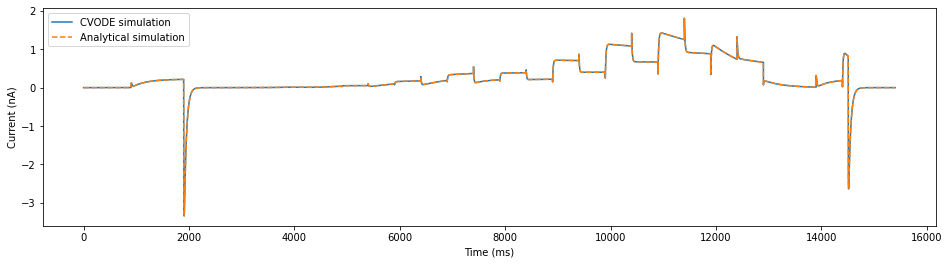

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import myokit
import myokit.lib.markov

# Load a model: this is the same model as before, but coded up as a Markov model (a kinetic scheme)
model = myokit.load_model('resources/beattie-2017-ikr-markov.mmt')

# Load a protocol
protocol = myokit.load_protocol('resources/simplified-staircase.mmt')

# Create a parametrisable Hodgkin-Huxley model
parameters = [
    'ikr.p1', 
    'ikr.p2', 
    'ikr.p3', 
    'ikr.p4', 
    'ikr.p5', 
    'ikr.p6', 
    'ikr.p7', 
    'ikr.p8', 
    'ikr.p9',
]
markov_model = myokit.lib.markov.LinearModel.from_component(model.get('ikr'), parameters=parameters)

# Create an analytical simulation
markov_sim = myokit.lib.markov.AnalyticalSimulation(markov_model, protocol)

# Create a CVODE simulation
cvode_sim = myokit.Simulation(model, protocol)

# Select times to log
tmax = 15400
times = np.arange(0, tmax, 0.1)

# Run a timed simulation with each method:
b = myokit.Benchmarker()
hh_log = markov_sim.run(tmax, log_times=times)
print(b.time())

b.reset()
cvode_log = cvode_sim.run(tmax, log_times=times, log=['ikr.IKr'])
print(b.time())

plt.figure(figsize=(16, 4))
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.plot(times, hh_log['ikr.IKr'], '-', label='CVODE simulation')
plt.plot(times, cvode_log['ikr.IKr'], '--', label='Analytical simulation')
plt.legend(loc='upper left')
plt.show()

Again we see a reasonable speed-up compared to CVODE, which will be very welcome when fitting.

## Single channel simulations

Markov models can also be used for discrete, single channel, simulations:

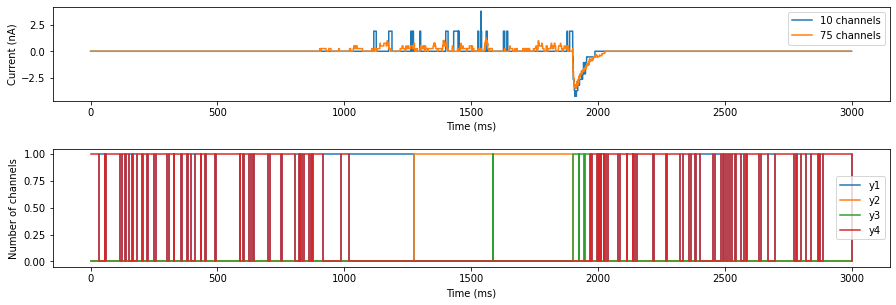

In [25]:
# Create a figure
plt.figure(figsize=(15,10))

# Simulate the first three seconds of the protocol, with various numbers of channels
sim = myokit.lib.markov.DiscreteSimulation(markov_model, protocol, nchannels=1)
log = sim.run(3000)
plt.subplot(4, 1, 1)
plt.plot(log.time(), log['ikr.IKr'], drawstyle='steps-post', label='1 channel')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')

# plot the state of the channel
plt.subplot(4, 1, 2)
plt.plot(log.time(),log['ikr.y1'], drawstyle='steps-post', label='y1')
plt.xlabel('Time (ms)')
plt.ylabel('Number of channels')
plt.subplot(4, 1, 2)
plt.plot(log.time(),log['ikr.y2'], drawstyle='steps-post', label='y2')
plt.subplot(4, 1, 2)
plt.plot(log.time(),log['ikr.y3'], drawstyle='steps-post', label='y3')
plt.subplot(4, 1, 2)
plt.plot(log.time(),log['ikr.y4'], drawstyle='steps-post', label='y4')
plt.legend()

sim = myokit.lib.markov.DiscreteSimulation(markov_model, protocol, nchannels=10)
log = sim.run(3000)
plt.subplot(5, 1, 1)
plt.plot(log.time(), log['ikr.IKr'], drawstyle='steps-post', label='10 channels')
plt.legend()

sim = myokit.lib.markov.DiscreteSimulation(markov_model, protocol, nchannels=75)
log = sim.run(3000)
plt.subplot(5, 1, 1)
plt.plot(log.time(), log['ikr.IKr'], drawstyle='steps-post', label='75 channels')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.legend()


plt.show()

## Summary

In this part of the tutorial we have seen that

- analytical solvers for Hodgkin-Huxley and Markov models can be used on step protocols
- these solvers can provide a speed-up over CVODE-based simulation, and help avoid issues with solver tolerance

In the next part of the tutorial we'll look at traditional step protocols, and how to combine multiple protocols into a single fit.